In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import the xlsx file
data = pd.read_excel("Cleaned Data.xlsx", sheet_name = "Data")

In [35]:
# remove extraneous spaces and standardize capitalization
strip_cols = ["Fund_source", "Fund_Source", "Loc_authors","Loc_experiment", 
              "Loc_journal", "Loc_editor_journal"]
for key in strip_cols:
    data[key] = data[key].str.strip().str.upper()

In [36]:
#transform outcomes to indicator variables
outcomes = ["Health_outcome", "Environmental_outcome"]
for outcome in outcomes:
    data[outcome][data[outcome].str.strip().str.title()=="Yes"] = 1
    data[outcome][data[outcome].str.strip().str.title()=="No"] = 0
    data[outcome].fillna(0, inplace = True)
    
# create column that combines environmental and health outcomes
# if value from either column is 1, entry in Either_outcome is 1, else 0
data["General_outcome"] = 0
data["General_outcome"][data["Health_outcome"] ==1] = 1
data["General_outcome"][data["Environmental_outcome"] ==1] = 1

<ipython-input-36-3a35d3532438>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[outcome][data[outcome].str.strip().str.title()=="Yes"] = 1
<ipython-input-36-3a35d3532438>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[outcome][data[outcome].str.strip().str.title()=="No"] = 0
<ipython-input-36-3a35d3532438>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["General_outcome"][data["Health_outcome"] ==1] = 1
<ipython-inp

In [37]:
def create_indicators(data, column_names):

    # create a dictionary with the set of possible responses for each heading in the headings list
    indicator_responses = {heading : sorted(list(set(data[heading]))) for heading in headings}

    # cycle through the heading and possible responses
    for heading, responses in indicator_responses.items():

        # for each possible response, create a new column
        for response in responses:
            # make all values in that column 0 by default
            data[response] = 0
            # identify the subset of data where the data in the row matches response
            # make values in that column 1 if their response matches the response 
            # in the original column of data
            data[response][data[heading] == response] = 1


In [38]:
nations = list(set(data["Loc_experiment"]))
remove_pairs = ["BELGIUM & GERMANY", "ITALY & NETHERLANDS", "CANADA & USA", "UK & USA"]
for pair in remove_pairs:
    nations.remove(pair)
for nation in nations:
    data[nation] = 0
    data[nation][data["Loc_experiment"].str.contains(nation)]=1
data

<ipython-input-38-2cee338bc8f6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[nation][data["Loc_experiment"].str.contains(nation)]=1


,Article_title,Article_link,General_outcome,"General_outcome (1,0)",Desc_general_outcome,Daily_intake,Descr_daily_intake,Health_outcome,Descr_health_outcome,Environmental_outcome,Descr_environmental_outcome,Fund_source,Fund_Source,University,Private,Private & Public,Private & University,Public,Public & International Org,Public & University,University & International Org,International Org,Research Institution,Not Available,Author_affiliation,Loc_authors,Loc_experiment,Year,Journal,Loc_journal,Loc_editor_journal,Current Impact_Factor,Impact_F_Publishing_Year,Num_Citations,JAPAN,MEXICO,IRELAND,FRANCE,AUSTRIA,CROATIA,NETHERLANDS,TUNISIA,UK,BRAZL,SWEDEN,PORTUGAL,BRAZIL,IRAQ,POLAND,HUNGARY,UKRAINE,ECUADOR,FINLAND,BELGIUM,EGYPT,THAILAND,SLOVENIA,SOUTH AFRICA,USA,SWITZERLAND,NEW ZEALAND,GREECE,SLOVAK REPUBLIC,MOROCCO,INDIA,CANADA,COLOMBIA,LATVIA,TAIWAN,SPAIN,DENMARK,NIGERIA,GERMANY,SRI LANKA,NORWAY,AUSTRALIA,TURKEY,ARGENTINA,CHINA,IRAN,CAMEROON,ROMANIA,SERBIA,ITALY,REPUBLIC OF KOREA
0,Potential of terracing to reduce glyphosate an...,https://link.springer.com/article/10.1007%2Fs1...,1,1,Found glyphosate in soil and sediment,NaN,NaN,0,NaN,1,Found glyphosate in soil and sediment,ITAIPU BINACIONAL AND PARQUE TECNOLOLÓGICO ITA...,PUBLIC,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,"Federal University of Paraná (UFPR), Sao Paulo...",BRAZIL,BRAZIL,2019,Journal of Soils and Sediments,SPRINGER-USA,AUSTRALIA & CANADA,2.790,2.79,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Uptake and persistence of the herbicide glyph...,https://cdnsciencepub.com/doi/abs/10.1139/x89-128,1,1,High glyphosate levels above maximum permissib...,NaN,NaN,0,NaN,1,Above maximum permissible residue level,UNIVERSITIES IN FORESTRY GRANT OF THE CANADA F...,PUBLIC,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,"University of Toronto, Forest Pest management ...",CANADA,CANADA,1989,Canadian Journal of Forest Research,CANADA,CANADA,1.812,NaN,29.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Residues of glyphosate and its metabolite AMPA...,https://cdnsciencepub.com/doi/pdf/10.4141/cjps...,0,0,Accepted seed residues of less than 5.0 mg kg-...,NaN,NaN,0,NaN,0,No residue when applied within accepted range,NONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Agriculture and Agri-Food Canada Research Stat...,CANADA,CANADA,1994,Canadian Journal of Plant Science,CANADA,CANADA,0.680,NaN,31.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Glyphosate pathways to modern diseases VI: Pri...,http://www.amsi.ge/jbpc/11717/25SA16A.pdf,1,1,Health risks associated with the indiscrimina...,NaN,NaN,1,"Health risk, presence of glyphosate in many po...",0,NaN,"QUANTA COMPUTERS, TAIWAN",PRIVATE,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Samsel Environmental and Public Health Service...,USA,USA,2017,Journal of Biological Physics and Chemistry,"BASEL, SWITZERLAND",UK,2.950,2.95,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,A generational study of glyphosate-tolerant so...,https://doi.org/10.1016/j.fct.2003.08.003,0,0,It was concluded that the transgenic soybean ...,NaN,NaN,0,No negative effect,0,NaN,"THE LEGISLATURE OF THE STATE OF SOUTH DAKOTA, ...",PUBLIC,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,"Department of Chemistry and Biochemistry, Sout...",USA,USA,2004,Food and Chemical Toxicology,"ELSEVIER, NETHERLANDS",SPAIN,4.679,2.662,108.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Effects of Soil Phosphorus Status on Environme...,http://dx.doi.org/10.2134/jeq2007.0256,1,1,Intensive use makes it one of the herbicides o...,NaN,NaN,0,NaN,1,Leaching into water,MINISTRY OF AGRICULTURE AND FORESTRY OF FINLAN...,PUBLIC,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,"MTT Agrifood Research Finland, FI‐31600 Jokioi..."

In [39]:
## Create indicator variables to represent funding source location
funding_sources = ["Public", "Private", "University", "International", "Research"]
data["Fund_Source"].fillna("", inplace = True)
data["Fund_Source"] = data["Fund_Source"].str.title()
for source in funding_sources:
    data[source] = 0
    data[source][data["Fund_Source"].str.contains(source)]=1
data[["Fund_Source"]+funding_sources]

<ipython-input-39-dba50e5d6eac>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[source][data["Fund_Source"].str.contains(source)]=1


,Fund_Source,Public,Private,University,International,Research
0,Public,1,0,0,0,0
1,Public,1,0,0,0,0
2,,0,0,0,0,0
3,Private,0,1,0,0,0
4,Public,1,0,0,0,0
5,Public,1,0,0,0,0
6,Public,1,0,0,0,0
7,Public,1,0,0,0,0
8,International Org,0,0,0,1,0
9,,0,0,0,0,0


In [40]:
### Kodjo develop this... 09232021 #####
## code for counting projects and calculating average outcome by funding source type


for key in funding_sources:
    print(key, data[key].sum(), data[data[key] == 1]["General_outcome"].mean())


Public 306 0.7745098039215687
Private 51 0.6078431372549019
University 114 0.7982456140350878
International 12 0.5833333333333334
Research 3 0.6666666666666666


In [41]:
years = list(set(data["Year"]))
for year in years:
    data[year] = 0
    data[year][data["Year"] == year] = 1

<ipython-input-41-a867f14c8da9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[year][data["Year"] == year] = 1
<ipython-input-41-a867f14c8da9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[year][data["Year"] == year] = 1
<ipython-input-41-a867f14c8da9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[year][data["Year"] == year] = 1
<ipython-input-41-a867f14c8da9>:4: SettingWithCopyWarning: 
A value is trying to be s

In [42]:
data.to_excel("dataWithSomeReformatting.xlsx")

In [43]:
# set view options to show entire dataframe
pd.set_option("max_rows", len(data.index))
pd.set_option("max_columns", len(data.columns))

In [44]:
# Average Outcome by Journal - Sort by number of observations
outcomes_by_journal = data.groupby("Journal").mean()[["General_outcome"]]
outcomes_by_journal["num_obs"] = data["Journal"].value_counts()
outcomes_by_journal.sort_values("num_obs", ascending = False)

,General_outcome,num_obs
Journal,,
Ecotoxicology and Environmental Safety,0.810811,37
Aquatic Toxicology,0.869565,23
Bulletin of Environmental Contamination and Toxicology,0.695652,23
Environmental Toxicology and Pharmacology,0.869565,23
Planta Daninha,0.782609,23
Environmental Toxicology and Chemistry,0.578947,19
Food and Chemical Toxicology,0.571429,14
"Journal of Environmental Science and Health, Part B",0.583333,12
Toxicology,1.000000,12


In [45]:
### Kodjo develop this... 09232021 #####
1
#journals = [list of journals to include]
# add to this list...
journals = ["Ecotoxicology and Environmental Safety",
            "Aquatic Toxicology",
           "Bulletin of Environmental Contamination and Toxicology",
           "Environmental Toxicology and Pharmacology",
           "Planta Daninha",
           "Environmental Toxicology and Chemistry",
           "Food and Chemical Toxicology",
           "Journal of Environmental Science and Health, Part B",
           "Toxicology",
           "Ecotoxicology",
           "Toxicology in Vitro",
           "Archives of Environmental Contamination and Toxicology",
           "Toxicology Letters"]
# Average Outcome by Journal - Sort by number of observations
top_journal_data = data[data["Journal"].isin(journals)]
data_before_2010 = top_journal_data[top_journal_data["Year"] < 2010]

outcomes_by_journal_before_2010 = data_before_2010.groupby("Journal").mean()[["General_outcome"]]
outcomes_by_journal_before_2010["num_obs"] = data_before_2010["Journal"].value_counts()
outcomes_by_journal_before_2010.sort_values("num_obs", ascending = False)

,General_outcome,num_obs
Journal,,
Planta Daninha,0.750000,16
Bulletin of Environmental Contamination and Toxicology,0.545455,11
Environmental Toxicology and Pharmacology,1.000000,6
Toxicology Letters,1.000000,5
Environmental Toxicology and Chemistry,0.500000,4
Ecotoxicology and Environmental Safety,0.666667,3
Food and Chemical Toxicology,0.000000,3
Aquatic Toxicology,1.000000,1
Archives of Environmental Contamination and Toxicology,0.000000,1


In [46]:
# make dataframe with data from after 2010
data_after_2010 = top_journal_data[top_journal_data["Year"] >= 2010]

outcomes_by_journal_after_2010 = data_after_2010.groupby("Journal").mean()[["General_outcome"]]
outcomes_by_journal_after_2010["num_obs"] = data_after_2010["Journal"].value_counts()
outcomes_by_journal_after_2010.sort_values("num_obs", ascending = False)

,General_outcome,num_obs
Journal,,
Ecotoxicology and Environmental Safety,0.823529,34
Aquatic Toxicology,0.863636,22
Environmental Toxicology and Pharmacology,0.823529,17
Environmental Toxicology and Chemistry,0.600000,15
Bulletin of Environmental Contamination and Toxicology,0.833333,12
Ecotoxicology,0.909091,11
Food and Chemical Toxicology,0.727273,11
Toxicology,1.000000,11
Toxicology in Vitro,0.800000,10


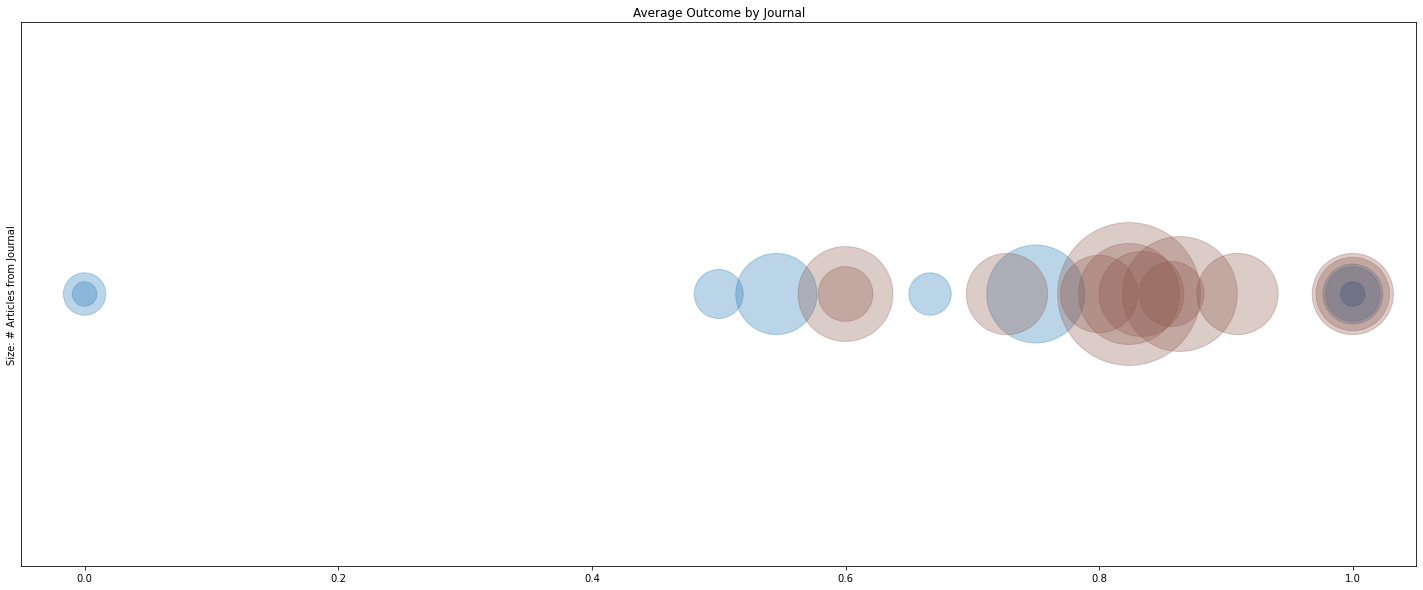

In [47]:
### Kodjo develop this to include data before and after 2010 differentiated by color... 09232021 #####


fig, ax = plt.subplots(figsize = (25,10))
plt.title("Average Outcome by Journal")
ax.set_ylabel('Size: # Articles from Journal')
ax.set_yticks([])
ax.scatter(x = outcomes_by_journal_before_2010["General_outcome"], 
           y = [0] * len(outcomes_by_journal_before_2010.index), 
           s = outcomes_by_journal_before_2010["num_obs"]*600, 
           color = "C0", 
           alpha = .3)

ax.scatter(x = outcomes_by_journal_after_2010["General_outcome"], 
           y = [0] * len(outcomes_by_journal_after_2010.index), 
           s = outcomes_by_journal_after_2010["num_obs"]*600, 
           color = "C5", 
           alpha = .3)
# plot data after 2010 on same ax 

In [48]:
# show results by country
outcomes_by_country = data.groupby("Loc_experiment").mean()[["General_outcome"]]
outcomes_by_country["num_obs"] = data["Loc_experiment"].value_counts()
outcomes_by_country.sort_values("num_obs", ascending = False)

,General_outcome,num_obs
Loc_experiment,,
BRAZIL,0.803922,102
ARGENTINA,0.886076,79
USA,0.555556,63
CANADA,0.433333,30
FRANCE,0.875000,24
CHINA,0.863636,22
POLAND,0.705882,17
ITALY,0.750000,16
GERMANY,0.600000,15


In [49]:
countries = ["Brazil",
            "Argentina",
            "USA",
            "Canada",
            "France",
            "China",
            "Poland",
            "Italy",
            "Germany",
            "India"]
top_country_data = data[data["Loc_experiment"].isin(countries)]
before_2010_data = top_country_data[top_country_data["Year"] < 2010]

country_before_2010 = before_2010_data.groupby("Loc_experiment").mean()[["General_outcome"]]
country_before_2010["num_obs"] = before_2010_data["Loc_experiment"].value_counts()
country_before_2010.sort_values("num_obs", ascending = False)

,General_outcome,num_obs
Loc_experiment,,
USA,0.25,20


In [20]:
after_2010_data = top_country_data[top_country_data["Year"] >= 2010]

country_after_2010 = after_2010_data.groupby("Loc_experiment").mean()[["General_outcome"]]
country_after_2010["num_obs"] = data_after_2010["Loc_experiment"].value_counts()
country_after_2010.sort_values("num_obs", ascending = False)

,General_outcome,num_obs
Loc_experiment,,
USA,0.697674,16


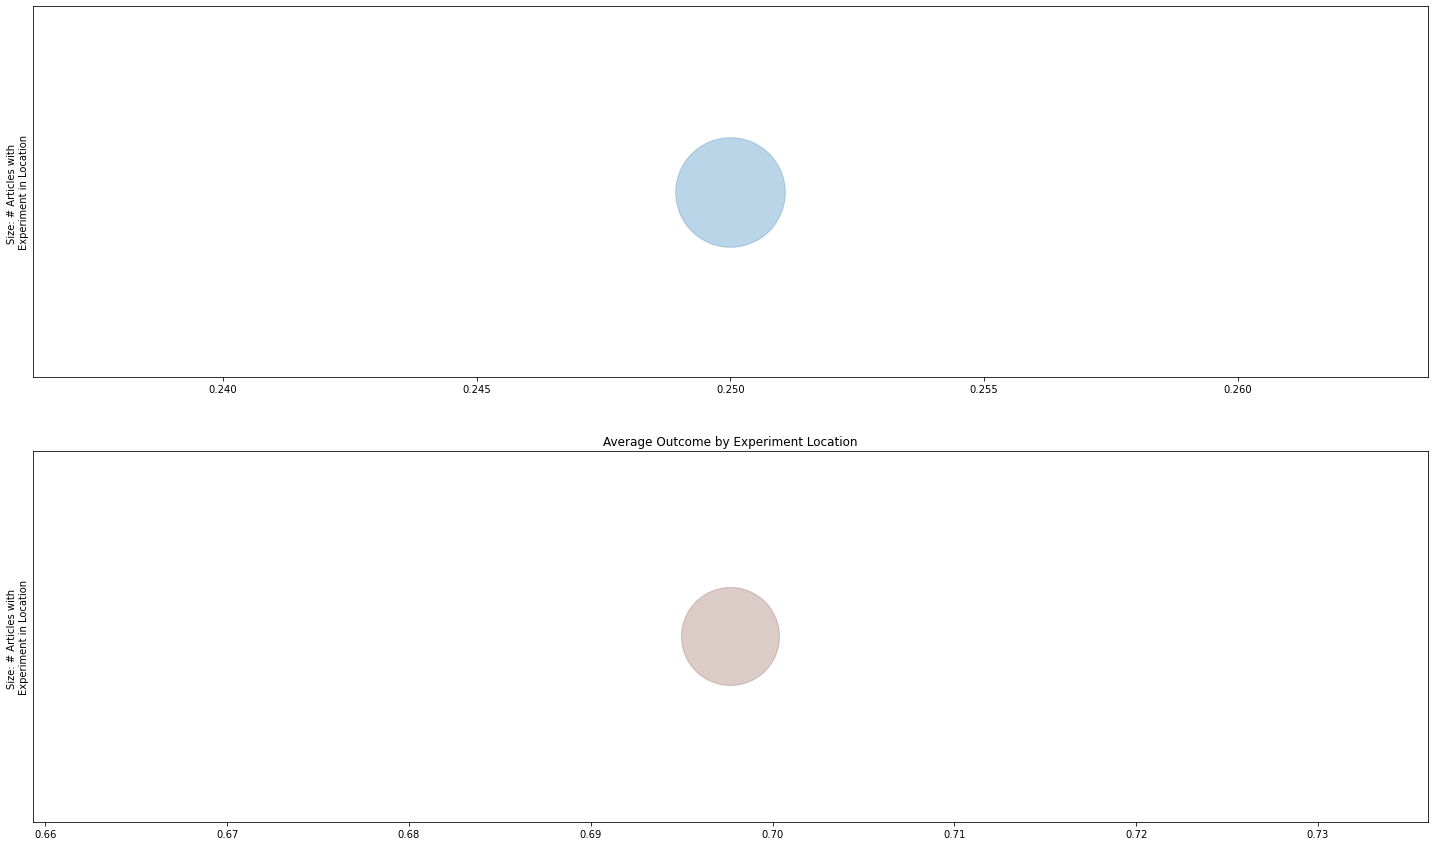

In [21]:
import random

fig, ax = plt.subplots(2, figsize=(25, 15))

plt.title("Average Outcome by Experiment Location")

ax[0].set_ylabel('Size: # Articles with \nExperiment in Location')
ax[0].set_yticks([])
ax[0].scatter(x = country_before_2010["General_outcome"], 
           y = [0] * len(country_before_2010.index), 
           s = country_before_2010["num_obs"]*600, 
           color = "C0", 
           alpha = .3)
ax[1].set_ylabel('Size: # Articles with \nExperiment in Location')
ax[1].set_yticks([])
ax[1].scatter(x = country_after_2010["General_outcome"], 
           y = [0] * len(country_after_2010.index), 
           s = country_after_2010["num_obs"]*600, 
           color = "C5", 
           alpha = .3)